# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Previewing the dataset
data.info

<bound method DataFrame.info of       winning_times
year               
1900           49.4
1904           49.2
1908           50.0
1912           48.2
1920           49.6
1924           47.6
1928           47.8
1932           46.2
1936           46.5
1948           46.2
1952           45.9
1956           46.7
1960           44.9
1964           45.1
1968           43.8
1972           44.7
1976           44.3
1980           44.6
1984           44.3
1988           43.9
1992           43.5
1996           43.5>

Plot this time series data. 

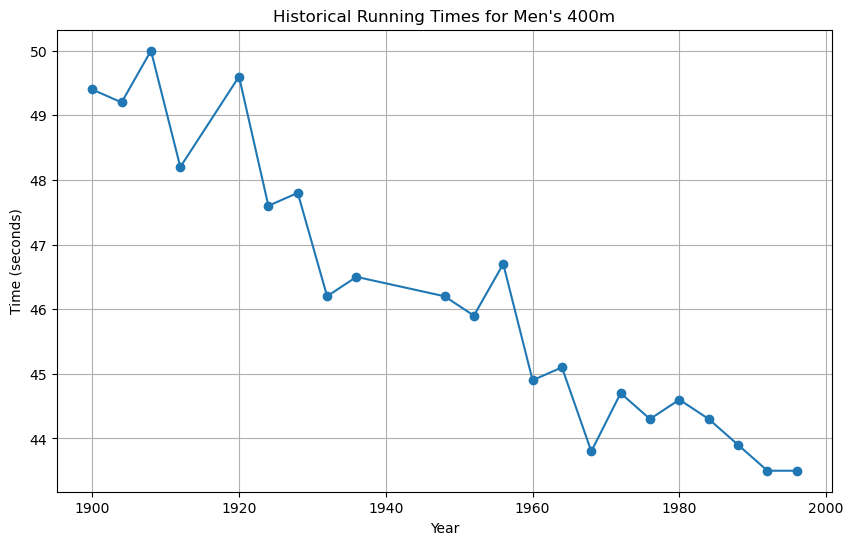

In [4]:
# Converting the period index to numeric values (years)
data["year"] = data.index.to_timestamp().year

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(data["year"], data["winning_times"], marker='o')
plt.title("Historical Running Times for Men's 400m")
plt.xlabel("Year")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [5]:
# Differencing the time series--while removing the missing values

data_diff = data["winning_times"].diff().dropna()

# differenced data
data_diff


year
1904   -0.2
1908    0.8
1912   -1.8
1920    1.4
1924   -2.0
1928    0.2
1932   -1.6
1936    0.3
1948   -0.3
1952   -0.3
1956    0.8
1960   -1.8
1964    0.2
1968   -1.3
1972    0.9
1976   -0.4
1980    0.3
1984   -0.3
1988   -0.4
1992   -0.4
1996    0.0
Freq: A-DEC, Name: winning_times, dtype: float64

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

<Figure size 1200x600 with 0 Axes>

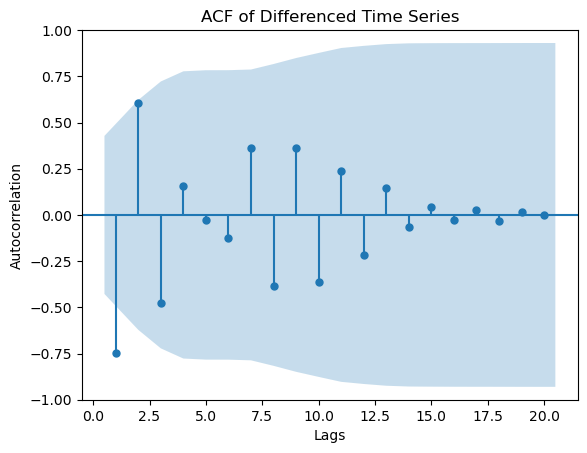

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF
plt.figure(figsize=(12, 6))
plot_acf(data_diff, lags=20, zero=False)
plt.title("ACF of Differenced Time Series")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


<Figure size 1200x600 with 0 Axes>

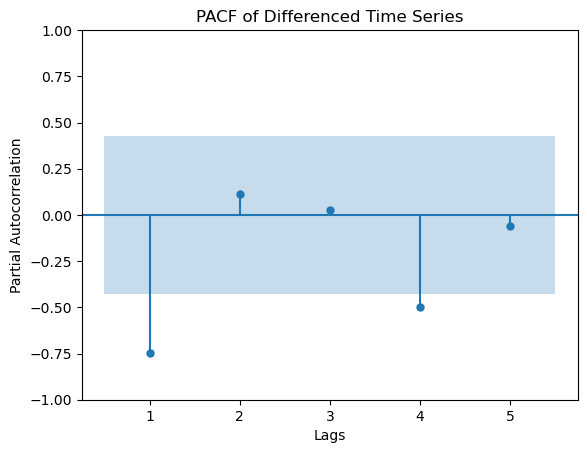

In [7]:
# Plotting the PACF with further reduced lags
plt.figure(figsize=(12, 6))
plot_pacf(data_diff, lags=5, zero=False)
plt.title("PACF of Differenced Time Series")
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.show()

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Candidate values for AR and MA orders
p_values = range(0, 4)  # AR order (0 to 3)
q_values = range(0, 4)  # MA order (0 to 3)

best_aic = float("inf")
best_bic = float("inf")
best_order = None

for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(data_diff, order=(p, 0, q))  # Note: d=0 as data is already differenced
            results = model.fit()

            aic = results.aic
            bic = results.bic

            if aic < best_aic and bic < best_bic:
                best_aic = aic
                best_bic = bic
                best_order = (p, 0, q)

            print(f"ARIMA({p}, 0, {q}) - AIC: {aic:.2f}, BIC: {bic:.2f}")
        except:
            continue

print(f"Best ARIMA Order: {best_order} - AIC: {best_aic:.2f}, BIC: {best_bic:.2f}")


ARIMA(0, 0, 0) - AIC: 60.56, BIC: 62.65
ARIMA(0, 0, 1) - AIC: 50.89, BIC: 54.02
ARIMA(0, 0, 2) - AIC: 50.03, BIC: 54.21


C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 3) - AIC: 42.94, BIC: 48.17
ARIMA(1, 0, 0) - AIC: 46.11, BIC: 49.24
ARIMA(1, 0, 1) - AIC: 47.92, BIC: 52.09
ARIMA(1, 0, 2) - AIC: 48.15, BIC: 53.37
ARIMA(1, 0, 3) - AIC: 47.39, BIC: 53.66
ARIMA(2, 0, 0) - AIC: 47.86, BIC: 52.04
ARIMA(2, 0, 1) - AIC: 49.86, BIC: 55.08
ARIMA(2, 0, 2) - AIC: 44.94, BIC: 51.21
ARIMA(2, 0, 3) - AIC: 46.74, BIC: 54.05
ARIMA(3, 0, 0) - AIC: 49.85, BIC: 55.07
ARIMA(3, 0, 1) - AIC: 49.12, BIC: 55.39
ARIMA(3, 0, 2) - AIC: 48.92, BIC: 56.23
ARIMA(3, 0, 3) - AIC: 46.75, BIC: 55.11
Best ARIMA Order: (0, 0, 3) - AIC: 42.94, BIC: 48.17


## What is your final model? Why did you pick this model?

AIC and BIC are information criteria used to evaluate the goodness of fit of statistical models. Lower AIC and BIC values indicate a better fit, and they help in selecting a model that provides a good balance between fit quality and model complexity.

In this case, the ARIMA(0, 0, 3) model has the lowest AIC and BIC values, making it the preferred choice based on these criteria.

In [9]:
# Fitting the best ARIMA model
best_model = ARIMA(data_diff, order=best_order)
best_results = best_model.fit()

print(best_results.summary())

C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 -16.471
Date:                Mon, 28 Aug 2023   AIC                             42.942
Time:                        22:02:10   BIC                             48.165
Sample:                    12-31-1904   HQIC                            44.076
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3071      0.059     -5.229      0.000      -0.422      -0.192
ma.L1         -0.9425      8.494     -0.111      0.912     -17.590      15.705
ma.L2          0.9447    116.698      0.008      0.9

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 